In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import gzip, os
import numpy as np
from scipy.stats import multivariate_normal

from urllib.request import urlretrieve

In [2]:
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)
    
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
# load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [4]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [5]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

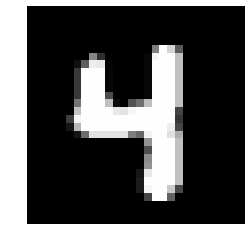

In [6]:
displaychar(train_data[58])

In [7]:
# split the training set into 2 sets: train_1 and valid sets
train_sub_size = int(0.8 * len(train_labels))
np.random.seed(0)
perm = np.random.permutation(len(train_labels))
sub_train_data = train_data[perm[0:train_sub_size],:]
sub_train_label = train_labels[perm[0:train_sub_size]]
valid_data = train_data[perm[train_sub_size:],:]
valid_label = train_data[perm[train_sub_size:]]

In [23]:
def test_model(my_mu, my_sigma, my_pi, x, y):
    num_class = 10
    score = np.zeros((len(y), num_class))
    for label in range(0, num_class):
        rv = multivariate_normal(mean=my_mu[label], cov=my_sigma[label], allow_singular=True)
        for i in range(0, len(y)):
            score[i,label] =  np.log(my_pi[label]) + rv.logpdf(x[i,:])
    predictions = np.argmax(score, axis=1)
    errors = np.sum(predictions != y)
    print("Your model makes " + str(errors) + "errors out of 10000")
    return errors

In [24]:
def choose_c(mu1, sigma1, pi1):
    num_class = mu1.shape[0]
    num_feature = mu1.shape[1]
    c_list = np.logspace(-1,2,num=20)
    det_list = np.zeros((20))
    new_sigma = np.array(sigma1)
    for i in range(len(c_list)):
        for label in range(num_class):
            new_sigma[label,:,:] = new_sigma[label,:,:] + c_list[i] * np.eye((num_feature))
            new_det = np.linalg.det(new_sigma[label,:,:])
            if (new_det == 0.0):
                break
        if (new_det != 0.0):
            choice = c_list[i]
            break
    
    print(c_list)
    print(choice)
    return (choice)

#mu_1, sigma_1, pi_1 = fit_generative_model(train_data, train_labels)
#choose_c(mu_1, sigma_1, pi_1)

In [25]:
def fit_2(x, y):
    k = 10
    d = (x.shape)[1]
    mu = np.zeros((k, d))
    sigma = np.zeros((k, d,d ))
    pi = np.zeros(k)
    
    # calculate mu, sigma, pi
    for label in range(k):
        indices = (y==label)
        mu[label] = np.mean(x[indices,:], axis=0)
        sigma[label] = np.cov(x[indices,:], rowvar=0, bias=1)
        pi[label] = float(sum(y==label))/float(len(y))
    return mu, sigma, pi

mu2, sigma2, pi2 = fit_2(train_data, train_labels)

In [32]:
mu2, sigma2, pi2 = fit_2(train_data, train_labels)
err = test_model(mu2, sigma2, pi2, test_data, test_labels)
print('err = ', err)

Your model makes 1862errors out of 10000
err =  1862


In [34]:
def regular_cov(extr_c, x, y):
    my_mu, my_sigma, my_pi = fit_2(train_data, train_labels)

    for j in range(10):
        for i in range(sigma3.shape[1]):
            my_sigma[j,i,i] = my_sigma[j,i,i] + extra_c
    
err = test_model(mu2, sigma3, pi2, test_data, test_labels)
print('The err is: ', err)

(784, 784)
319225
0.0
0.0
(10, 784)
908.5613675348352
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(784, 784)
after adding extra c, det =  5.731243891885756e-122
after adding extra c, det =  0.0
after adding extra c, det =  inf
after adding extra c, det =  9.19681193290023e+102
after adding extra c, det =  1.643016603219038e+133
after adding extra c, det =  1.3417036200160414e+156
after adding extra c, det =  3.775333484067297e-158
after adding extra c, det =  50739628211191.91
after adding extra c, det =  2.418273731582193e-27
after adding extra c, det =  2.7749159729181547e-244
Your model makes 1862errors out of 10000
The err is:  1862


In [80]:
def fit_generative_model(x, y):
    k = 10
    d = (x.shape)[1]
    mu = np.zeros((k, d))
    sigma = np.zeros((k, d,d ))
    pi = np.zeros(k)
    
    # calculate mu, sigma, pi
    for label in range(k):
        indices = (y==label)
        mu[label] = np.mean(x[indices,:], axis=0)
        sigma[label] = np.cov(x[indices,:], rowvar=0, bias=1)
        pi[label] = float(sum(y==label))/float(len(y))
        
    # with these sets, choose the best c
    ## my code to select a good c
    # 1. init c, set up a multivariate guassian for the subset, test the validation set,
    # 2. choose the c which has the lowest error among the validation set
    best_c = choose_c(mu, sigma, pi)
    for label in range(k):
        sigma[label,:,:] = sigma[label,:,:] + best_c * np.eye((d))
    return mu, sigma, pi

Your model makes 1862errors out of 10000
1862


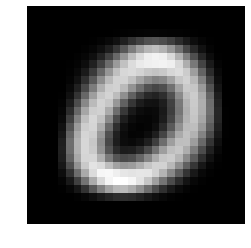

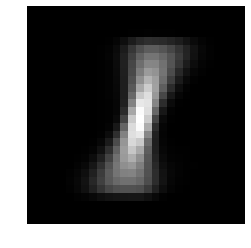

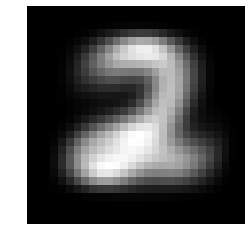

In [37]:
mu, sigma, pi = fit_2(train_data, train_labels)
err = test_model(mu, sigma, pi, test_data, test_labels)
print(err)
displaychar(mu[0])
displaychar(mu[1])
displaychar(mu[2])

In [ ]:
err = test_model()